# <시계열 2>

# 1. 단변량 시계열 분석

# 1-1. 안정적 시계열 분석
## 자기 회귀 모델 (Autogressive Model, AR)
### 개념
- 독립변수: 과거 자신의 값 -> 현재 값 에측
- 시계열 데이터의 자기상관성 활용

### 식
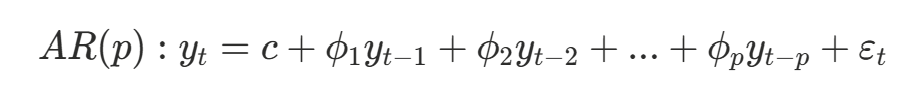
- AR(p): p차 자기 회귀 모형
- 과거 p개 시점의 데이터 선형 조합 -> 예측!

### OLS vs AR
- OLS 회귀
    - X가 Y에 어떤 영향 미치는지 설명
    - 예측보단 설며역 중심
    - 현재 관측된 X값 근처에서만 유효
    - 시계열 예측에 적합하지 x
- AR 모형
    - 시계열 예측용 모델
    - 예측값 사용하는 구조 -> 모델 설계에 포함
    - MLE(최우도추정) 기반 -> 파라미터 추정

## 이동 평균 모델 (Moving Average, MA)
### 개념
- 독립변수: 과거 시점의 잔차 -> 현재 값 예측
- 잔차 = 백색잡음 -> 서로 독립적<br>
    => 백색잡음: 평균 0, 분산 일정, 외부 충격에 의해서만 결정

### 식
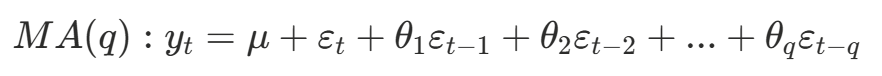
- MA(q): q차 이동 평균 모형
- 과거 q개의 예측 오차 선형 결합 -> 예측

## AR, MA 모델 전제 조건
### 1. 정상성
- 확률적 안정성 전제 -> 정상성 만족해야 함
- AR 모델 정상성 조건
    - 특성 방정식<br>
    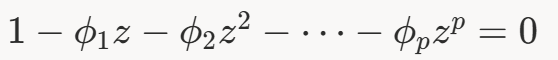<br>
    - 모든 해의 절댓값 > 1
- MA 모델 정상성 조건
    - 잔차: 정상성 이미 만족 -> 항상 정상성 만족!

### 2. 가역성
- MA 모형을 AR 형태로 재표현 가능 여부<br>
=> 오차항을 과거 관측값으로 표현 가능해야 안정적!
- AR 모델 가역성 조건
    - 처음부터 AR 형태로 표현 -> 가역성 체크 X
- MA 모델 가역성 조건
    - 특성 방정식<br>
    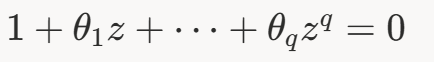<br>
    - 모든 해의 절댓값 > 1

## ARMA (Autogressive Moving Average) 모형
### 개념
- AR(p) + MA(q) 모형 결합
- 과거 p개 관측값 + 과개 q개 오차 -> 에측
- AR(p) 모형의 정상성 + MA(q) 모형의 가역성 둘 다 만족
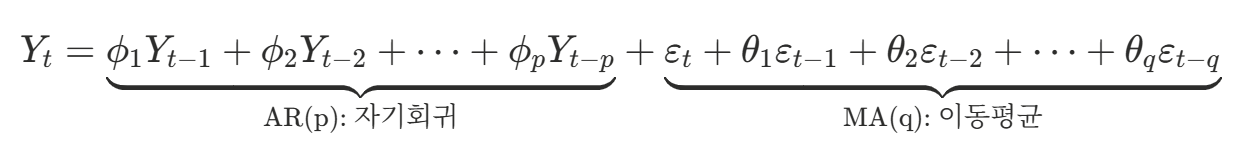

### 특수한 경우
- ARMA(p, 0): AR(p)와 동일
- ARMA(0, q): MA(q)와 동일
- ARMA(0, 0): 백색잡음 모델과 동일

## 차수 결정 방법
### 자기 상관 계수 (Auto Correlation Function, ACF)
- ARMA(p, q) 모형에서 사용할 q개 오차 결정 방법
- 두 지점 사이 상관 관계 + 간접 영향 파악
- 그래프 의미
    - AR 모델: 천천히 감소 or 진동 감소
    - MA 모델: q+1 시점부터 0으로 절단 (오차항 영향 x)
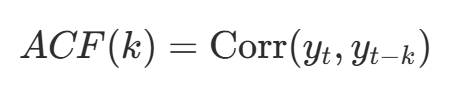

### 부분 자기 상관 계수 (Partial Autocorrelation Function, PACF)
- ARMA(p, q) 모형에서 사용할 p개 시점 결정 방법
- 두 지점 사이 직접적 영향 파악 (다른 시점들과의 상호 의존성 제거)
- 그래프 의미
    - AR 모델: p+1 시점부터 0으로 절단
    - MA 모델: 천천히 감소 or 진동 감소
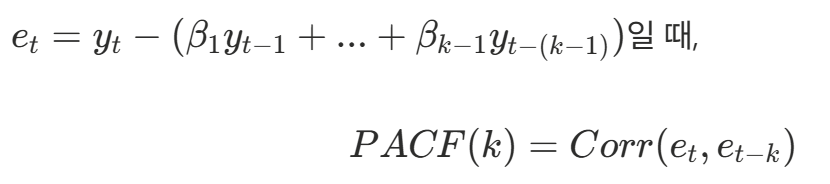

# 1-2. 불안정 시계열

## 분석 프로세스
1. 비정상 시계열 데이터 (추세 or 계절성 존재)
2. 차분, 계절성 차분 -> 정상성 확보
3. 정상 시계열
4. ARMA -> 안정적 시계열 분석

## ARIMA (Autoregressive Integrated Moving Average)
### 개념
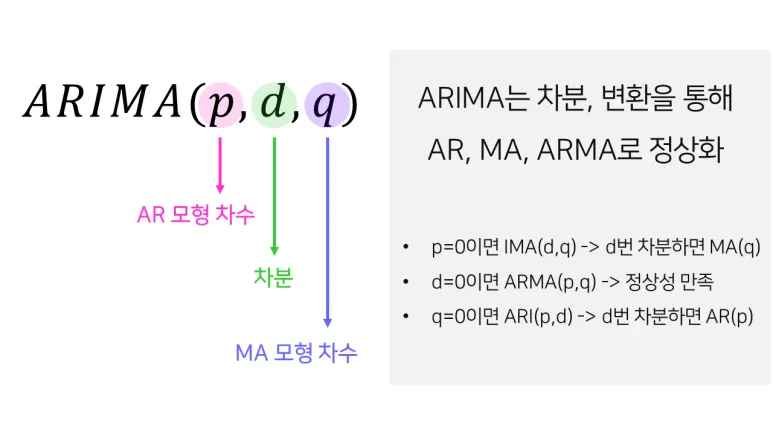
- ARMA(p, q) + 차분 -> ARIMA(p, d, q)

### 특수한 경우
- ARIMA(0, 0, 0): 백색잡음
- ARIMA(p, 0, 0) = AR(p): 자기회귀
- ARIMA(0, 0, q) = MA(q): 이동평균
- 상수 없는 ARIMA(0, 1, 0): 랜덤워크
    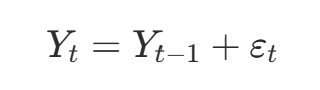<br>
    - 이전 값 + 무작위 충격 -> 예측 불가
    - 방향성 존재 x
- 상수 있는 ARIMA(0, 1, 0): 표류 포함 랜덤워크
    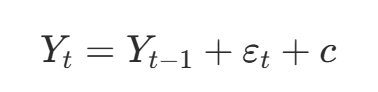<br>
    - 시간 지날수록 상수항 누적 -> 방향성 존재

## SARIMA (Seasonal ARIMA)
### 개념
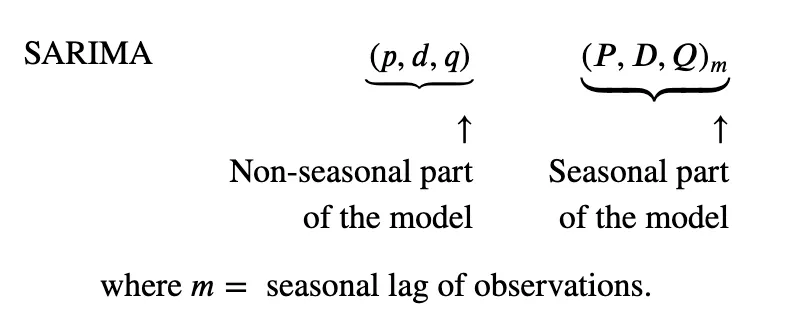
- ARIMA(p, d, q) + 계절성 차분 -> SARIMA(p, d, q)(P, D, Q)_m
- 시계열 데이터의 계절성 처리
- ARIMA + 계절성 변동 반영
- 계절성 추세로 ACF, PACF 그래프 주기 가짐 -> 계절성 차분 먼저 수행!
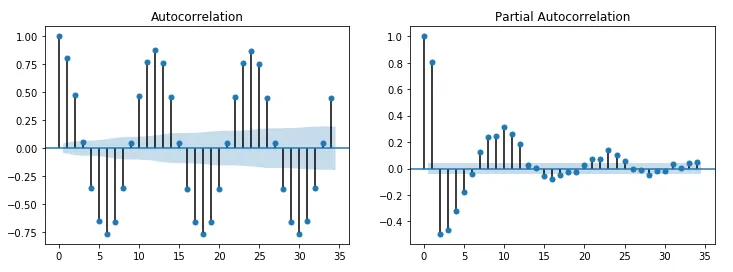

### 불안정형 시계열 하이퍼파라미터 결정 방법
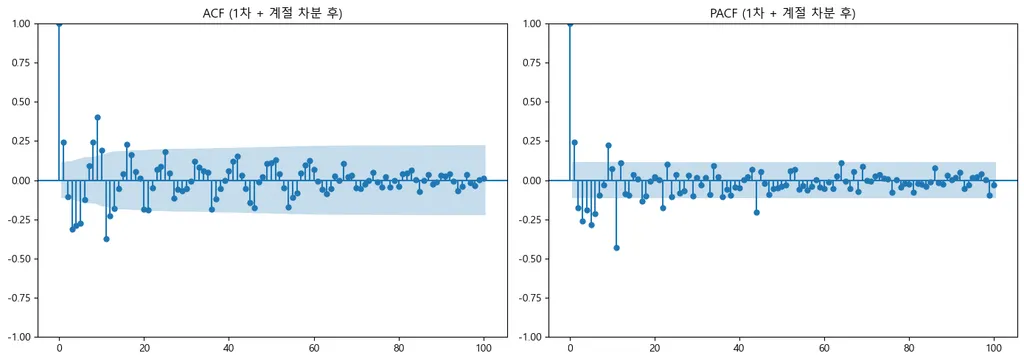
- 그래프 -> 명확한 결과 x
- d, D(차분, 계절 차분) 결정
    - ADF(단위근 검정) -> 정상성 확보 여부 판단 후 결정
    - 차분 정도: 대부분 0 or 1
- p, q (AR, MA 차수) 결정
    -  ACF, PACF로 범위 추정
    - AIC, BIC 기준 그리드 서치 -> 최종 선택
        - AIC, BIC: 모델 성능 평가
        - 값 낮을수록 모델 성능 좋음
    - p, q 범위: 대부분 0~3

# 2. 다변량 시계열 분석
## VAR(Vector Autoregression)
### 개념
- 자신의 과거 값 + 다른 변수 과거 값 -> 미래 예측<br>
=> 양방향!
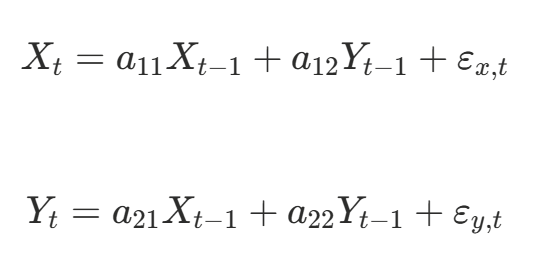<br>
- 여러 지표가 서로 영향 주고 받음, 상호 의존성 중요한 경우 사용

### 분석 방법
- 충격 반응 함수 (IRF, Impulse-Response Function)
    - 한 시계열에서 충격 발생 -> 다른 시계열에 어떤 영향 주는지
- 예측오차 분산 분해 (Variance Decomposition)
    - 어떤 시계열이 상대적으로 어떤 영향 끼치고 있는지 분석<br>
    => 중요도 산출!

### 장단점
- 장점
    - 변수 간 양방향 분석 가능
    - 여러 변수 함께 예측
    - 동시성 문제 x
- 단점
    - 변수 많으면 파라미터 폭발
    - 장기적 관계 정보 손실
    - 상관관계 =/= 인과관계

# 3. 딥러닝을 활용한 시계열 분석
## 등장 배경
- 전통 통계 모델의 한계
    - 처리 속도 느림
    - 데이터 크기 고정
    - 비선형 패턴 포착 어려움

## RNN 계열
### RNN
- 이전 시점 정보 -> 현재로 전달 (순환 구조)
- 적합한 경우
    - 짧은 ~ 중간 길이 시계열
    - 순차적 의존성 강함
    - 자기상관 큰 데이터

### LSTM
- 게이트 메커니즘 -> 장기 기억 유지
- 적합한 경우
    - 장기 의존성 중여
    - 중요한 과거 이벤트 -> 먼 미래에 영향

### GRU
- LSTM 단순화 -> 빠르게 학습, 성능 비슷
- 적합한 경우
    - 장기 의존성 필표 & 학습 속도 중요
    - 데이터 상대적으로 적을 때
    - 실시간 처리 필요

## Transformer 계열
### Transformer
- 어텐션 메커니즘 -> 모든 시점 동시 참조해 병렬 처리
- 적합한 경우
    - 매우 긴 시계열
    - 전역 패턴 중요
    - 대규모 데이터
    - 다변량 시계열
- 상세 모델
    - Vanilla Transformer: 기본 transformer
    - Informer: ProbSparse Attention
    - Autoformer: 요소분해 + 자기상관
    - Temporal Fusion Transformer(TFT): 다중 시점 예측 + 외생 변수

## Foundation Model
### 개념
- 거대한 데이터로 사전 학습 -> 다양한 문제 해결<br>
=> 범용적 모델!

### LLM 기반 모델
- 대규모 언어 모델 패턴 인식 능력 -> 시계열에 활용
- 종류
    - Without Adaption: 프롬프트 엔지니어링에 집중
    - Adapt LLM: LLM -> 시계열 데이터로 fine-tuning
    - Adapt to LLM: 시계열 -> 텍스트 변환 후 LLM 활용

### 자체 거대 모델
- 대규모 시계열 데이터로 사전 학습 -> 다양한 예측 문제에 범용적 적용
- ex) TImeGPT, TimesFM, Moirai







